# Visual Consistency Evaluator Toolset

A suite of metrics to evaluate the visual consistency between AI generated and ground-truth images
Covering:
- Mean Squared Error (MSE)
- Color Histogram Analysis
- Structural Similarity Index (SSIM)
- Keypoint Comparison
- Perceptual Loss via Feature Maps
- Style Loss
- Content Loss

### Plot Values Test 4

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create DataFrame
df = pd.DataFrame( )
 
data1={"Method": "Masking Strategy 2",   'MSE (↓)': 8.265873057501656, 'Color': 0.9479977751119704, 'SSIM': 0.9615703630018902,    'Content (↓)': 1.9288095661572047, 'Style (↓)': 0.04908918562744345} 

data0={"Method": "Masking Strategy 1",  'MSE (↓)': 8.45539959271749, 'Color': 0.9612028149297095, 'SSIM': 0.9612028149297095,    'Content (↓)': 2.1843632757663727, 'Style (↓)': 0.05212417763790914} 
data2={"Method": "Masking Strategy 3",  'MSE (↓)':8.13979665438334, 'Color': 0.9565728546630278, 'SSIM': 0.9622249811311632,    'Content (↓)': 1.7082425164324897, 'Style (↓)': 0.05234869170401778} 
data3={"Method": "Base Pose Image",   'MSE': 1.6989469528198242, 'Color': 0.9884150103656182, 'SSIM': 0.9834751546700357,    'Content': 0.7632147882665906, 'Style': 0.012191412970423698} 
 
# Combine into DataFrame
df = pd.DataFrame([data0, data1, data2])
df.set_index('Method', inplace=True)

# Metrics and their custom ranges
categories = ['MSE (↓)', 'Color', 'SSIM', 'Content (↓)', 'Style (↓)']
custom_ranges = {
    "MSE (↓)": (8, 9),
    "Color": (0.93, 0.97),
    "SSIM": (0.96, 0.963),
    "Content (↓)": (1, 3),
    "Style (↓)": (0.045, 0.055)
}

# Normalize values to [0,1] scale
df_custom = df.copy()
for cat in categories:
    min_val, max_val = custom_ranges[cat]
    df_custom[cat] = (df_custom[cat] - min_val) / (max_val - min_val)

df_custom = df_custom.clip(lower=0, upper=1)
df_custom['MSE (↓)'] = 1 - df_custom['MSE (↓)']
df_custom['Content (↓)'] = 1 - df_custom['Content (↓)']
df_custom['Style (↓)'] = 1 - df_custom['Style (↓)']

# Radar chart setup
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the circle

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot each method
for method in df_custom.index:
    values = df_custom.loc[method, categories].values
    values = np.concatenate((values, [values[0]]))  # Close the plot
    ax.plot(angles, values, label=method, linewidth=1.5)
    ax.fill(angles, values, alpha=0.1)

# Custom axis labels inside white boxes
labels_with_range = [f"{cat}\n[{custom_ranges[cat][0]}–{custom_ranges[cat][1]}]" for cat in categories]

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels_with_range, fontsize=12)

# Add white background to labels
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_fontsize(11)
    label.set_rotation(angle * 180 / np.pi - 90)

# Legend placement
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.figtext(0.5, -0.05, "(↓) Indicates an inverted metric, so now higher is better", ha="center", fontsize=12)

plt.tight_layout()
plt.savefig("radar_chart.png", dpi=300, bbox_inches='tight')

plt.show()
 

{'Method': 'Scetch', 'Content': 1.0062027860570837, 'Style': 0.06862070535620053, 'SSIM': 0.9576884498627259, 'MSE': 9.039101541778187, 'Color': 0.9523221699705673}
{'Method': 'Low Quality + Masking 2', 'Content': 1.4438175775788047, 'Style': 0.0773931396278468, 'SSIM': 0.8920534858071127, 'MSE': 8.334588108640729, 'Color': 0.959355626418958}
{'Method': 'Low Quality + Masking 3', 'Content': 1.9943039748403761, 'Style': 0.07699296064674854, 'SSIM': 0.9500061249699471, 'MSE': 9.944357218565765, 'Color': 0.9434787672264241}


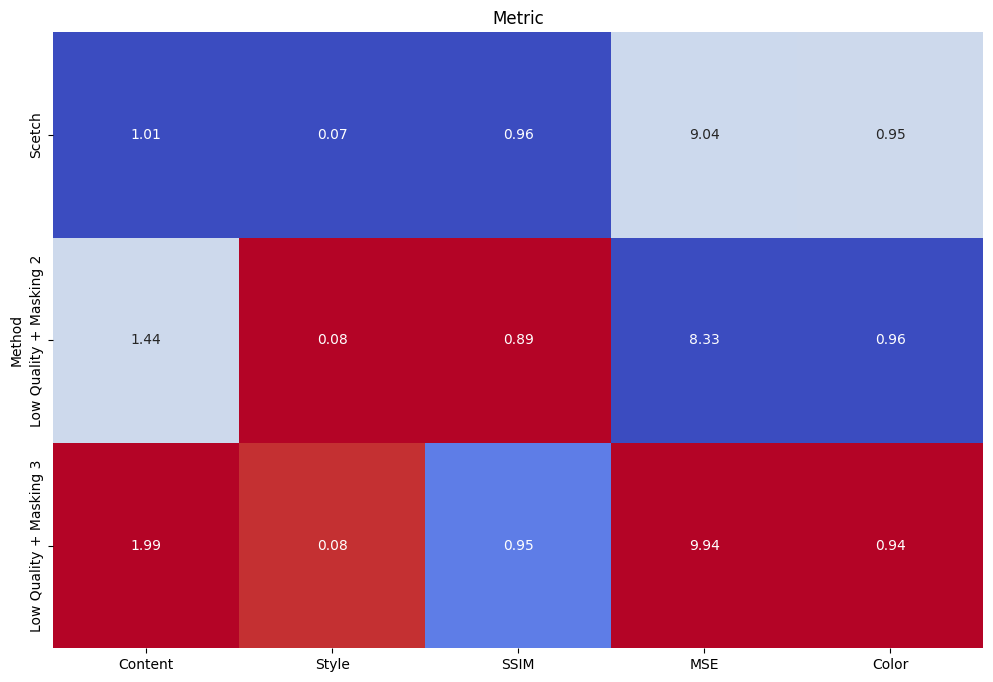

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# Create DataFrame
df = pd.DataFrame( )

 

data0={"Method": "Low Quality + Masking 2", 'Content': 1.44381757757880479, 'Style': 0.0773931396278468, 'SSIM': 0.8920534858071127,  'MSE': 8.334588108640729, 'Color': 0.959355626418958} 
data1={"Method": "Low Quality + Masking 3",  'Content':1.9943039748403761, 'Style': 0.07699296064674854, 'SSIM': 0.9500061249699471, 'MSE': 9.944357218565765, 'Color': 0.9434787672264241} 
data2={"Method": "Scetch",  'Content':1.0062027860570837, 'Style': 0.06862070535620053, 'SSIM': 0.9576884498627259, 'MSE': 9.039101541778187, 'Color': 0.9523221699705673} 


df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data0])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data1])], ignore_index=True)


 
# Extract all rows into a list of dictionaries
rows_as_dicts = df.to_dict(orient="records")

# Print each row in the required format
for row in rows_as_dicts:
    print(row)
 
# Convert all numeric columns to numeric types
for column in df.columns[1:]:  # Skip the "Method" column
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Specify metrics where higher is better
higher_is_better = ["SSIM", "Color", "Success Rate"]

# Normalize each metric individually
normalized_df = df.copy()
for column in df.columns:
    if column == "Method":
        continue  # Skip the Method column
    col_min = df[column].min()
    col_max = df[column].max()
    if column in higher_is_better:
        # Higher is better: normalize normally
        normalized_df[column] = (df[column] - col_min) / (col_max - col_min)
    else:
        # Lower is better: invert the normalization
        normalized_df[column] = (col_max - df[column]) / (col_max - col_min)

# Set Method as index
normalized_df.set_index("Method", inplace=True)

# Heatmap with per-metric normalization
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False)
plt.title("Metric", fontsize=12)
plt.show()
#sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False).figure.savefig("heatmap2.png", dpi=300, bbox_inches="tight")


## Plot Values Test 3

In [84]:
!pip install ace_tools



[notice] A new release of pip available: 22.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


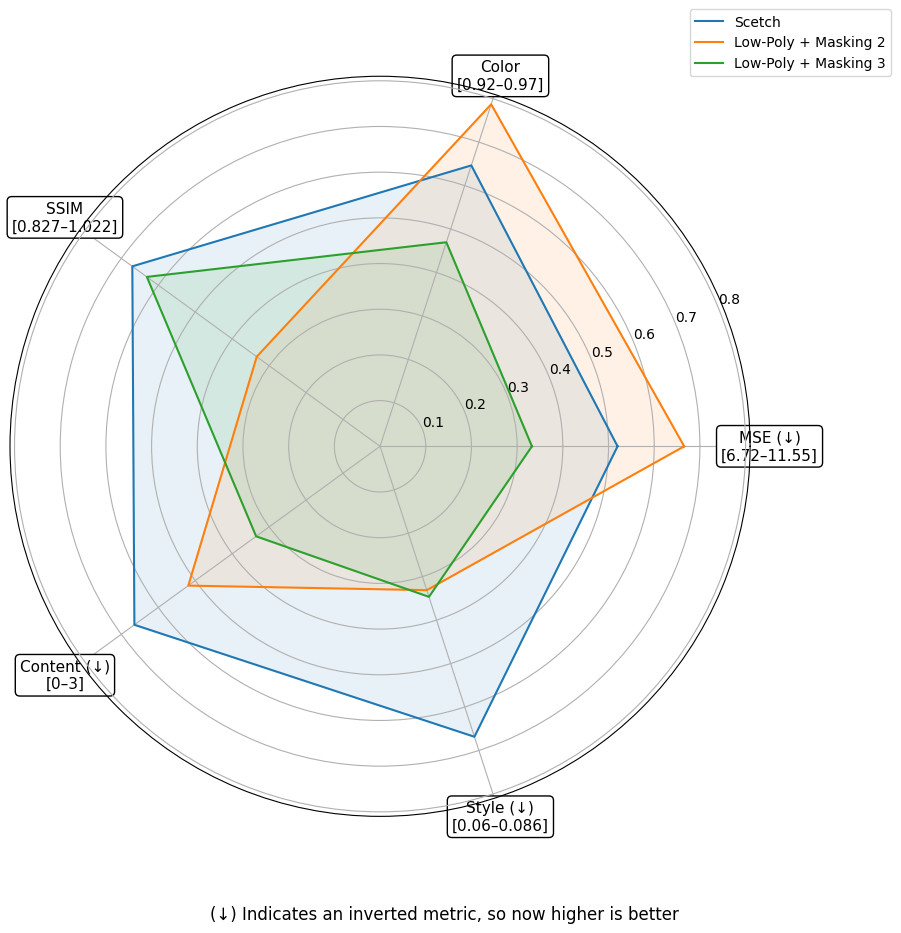

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create DataFrame
df = pd.DataFrame( )
 

data0={"Method": "Low-Poly + Masking 2", 'Content (↓)': 1.44381757757880479, 'Style (↓)': 0.0773931396278468, 'SSIM': 0.8920534858071127,  'MSE (↓)': 8.334588108640729, 'Color': 0.959355626418958} 
data1={"Method": "Low-Poly + Masking 3",  'Content (↓)':1.9943039748403761, 'Style (↓)': 0.07699296064674854, 'SSIM': 0.9500061249699471, 'MSE (↓)': 9.944357218565765, 'Color': 0.9434787672264241} 
data2={"Method": "Scetch",  'Content (↓)':1.0062027860570837, 'Style (↓)': 0.06862070535620053, 'SSIM': 0.9576884498627259, 'MSE (↓)': 9.039101541778187, 'Color': 0.9523221699705673} 


df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data0])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data1])], ignore_index=True)


df.set_index('Method', inplace=True)

# Metrics and their custom ranges
categories = ['MSE (↓)', 'Color', 'SSIM', 'Content (↓)', 'Style (↓)']
custom_ranges = {
    "MSE (↓)": (6.72, 11.55),
    "Color": (0.92, 0.97),
    "SSIM": (0.827, 1.022),
    "Content (↓)": (0, 3),
    "Style (↓)": (0.06, 0.086)
}

# Normalize values to [0,1] scale
df_custom = df.copy()
for cat in categories:
    min_val, max_val = custom_ranges[cat]
    df_custom[cat] = (df_custom[cat] - min_val) / (max_val - min_val)

df_custom = df_custom.clip(lower=0, upper=1)
df_custom['MSE (↓)'] = 1 - df_custom['MSE (↓)']
df_custom['Content (↓)'] = 1 - df_custom['Content (↓)']
df_custom['Style (↓)'] = 1 - df_custom['Style (↓)']

# Radar chart setup
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the circle

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot each method
for method in df_custom.index:
    values = df_custom.loc[method, categories].values
    values = np.concatenate((values, [values[0]]))  # Close the plot
    ax.plot(angles, values, label=method, linewidth=1.5)
    ax.fill(angles, values, alpha=0.1)

# Custom axis labels inside white boxes
labels_with_range = [f"{cat}\n[{custom_ranges[cat][0]}–{custom_ranges[cat][1]}]" for cat in categories]

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels_with_range, fontsize=12)

# Add white background to labels
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_fontsize(11)
    label.set_rotation(angle * 180 / np.pi - 90)

# Legend placement
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.figtext(0.5, -0.05, "(↓) Indicates an inverted metric, so now higher is better", ha="center", fontsize=12)

plt.tight_layout()
plt.savefig("radar_chart.png", dpi=300, bbox_inches='tight')

plt.show()
 

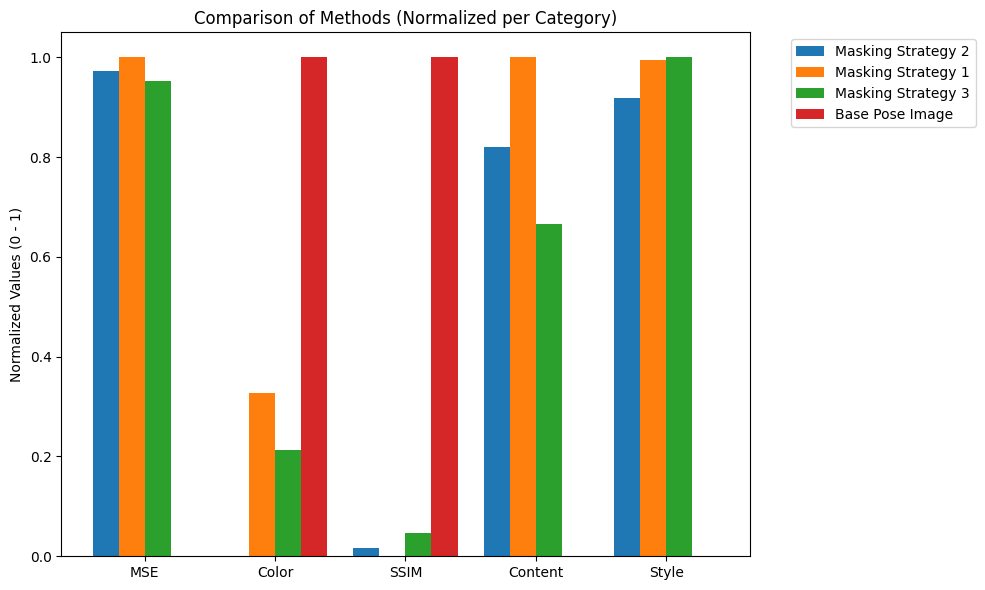

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data
data0 = {
    "Method": "Masking Strategy 2", 
    "MSE": 8.265873057501656, 
    "Color": 0.9479977751119704, 
    "SSIM": 0.9615703630018902,
    "Content": 1.9288095661572047, 
    "Style": 0.04908918562744345
}

data1 = {
    "Method": "Masking Strategy 1",  
    "MSE": 8.45539959271749, 
    "Color": 0.9612028149297095, 
    "SSIM": 0.9612028149297095,
    "Content": 2.1843632757663727, 
    "Style": 0.05212417763790914
}

data2 = {
    "Method": "Masking Strategy 3",  
    "MSE": 8.13979665438334, 
    "Color": 0.9565728546630278, 
    "SSIM": 0.9622249811311632,
    "Content": 1.7082425164324897, 
    "Style": 0.05234869170401778
}

data3 = {
    "Method": "Base Pose Image",   
    "MSE": 1.6989469528198242, 
    "Color": 0.9884150103656182, 
    "SSIM": 0.9834751546700357,
    "Content": 0.7632147882665906, 
    "Style": 0.012191412970423698
}

all_data = [data0, data1, data2, data3]

df = pd.DataFrame(all_data)
df.set_index("Method", inplace=True)

# The categories we want to compare
categories = ["MSE", "Color", "SSIM", "Content", "Style"]

# ============================
# 1) Normalize each category
# ============================

df_norm = df.copy()

for cat in categories:
    col_min = df_norm[cat].min()
    col_max = df_norm[cat].max()
    # Avoid division by zero if col_min == col_max
    if col_max - col_min == 0:
        df_norm[cat] = 0.0
    else:
        df_norm[cat] = (df_norm[cat] - col_min) / (col_max - col_min)

# If you want to invert certain metrics (e.g., MSE)
# so that lower MSE => higher bar, do something like:
# df_norm["MSE"] = 1 - df_norm["MSE"]

# ============================
# 2) Create grouped bar chart
# ============================

methods = df_norm.index.tolist()  # List of methods
x = np.arange(len(categories))     # X positions for categories
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each method side by side
for i, method in enumerate(methods):
    values = df_norm.loc[method, categories].values
    bar_positions = x + i * bar_width
    ax.bar(bar_positions, values, width=bar_width, label=method)

# Center x-ticks under the grouped bars
ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(categories)

# Labels and legend
ax.set_ylabel("Normalized Values (0 - 1)")
ax.set_title("Comparison of Methods (Normalized per Category)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Plot Values Test 2

{'Method': 'Fine-Tuned + DDIM', 'Success Rate': 0.975, 'MSE': 15.414100329081219, 'Color': 0.9479977751119704, 'SSIM': 0.8920534858071127, 'Content': 10.035277134180069, 'Style': 0.19470126312226058}
{'Method': 'Vanilla + Euler', 'Success Rate': 1.0, 'MSE': 13.091511726379395, 'Color': 0.8984969457576236, 'SSIM': 0.8982814333875513, 'Content': 9.294315758347512, 'Style': 0.37810273803770544}
{'Method': 'SF3D', 'Success Rate': 1.0, 'MSE': 13.091511726379395, 'Color': 0.8984969457576236, 'SSIM': 0.8982814333875513, 'Content': 10.770970726013184, 'Style': 0.4218773037195206}
{'Method': 'Fine-Tuned', 'Success Rate': 0.9375, 'MSE': 22.64571934541066, 'Color': 0.8914266735744594, 'SSIM': 0.8521200869848169, 'Content': 18.369458198547363, 'Style': 0.8944506253115833}
{'Method': 'Vanilla + DDIM', 'Success Rate': 0.1666, 'MSE': 17.90114156405131, 'Color': 0.9096583776478422, 'SSIM': 0.8809681172671027, 'Content': 17.99575087428093, 'Style': 0.48895684839226305}
{'Method': 'Vanilla', 'Success Ra

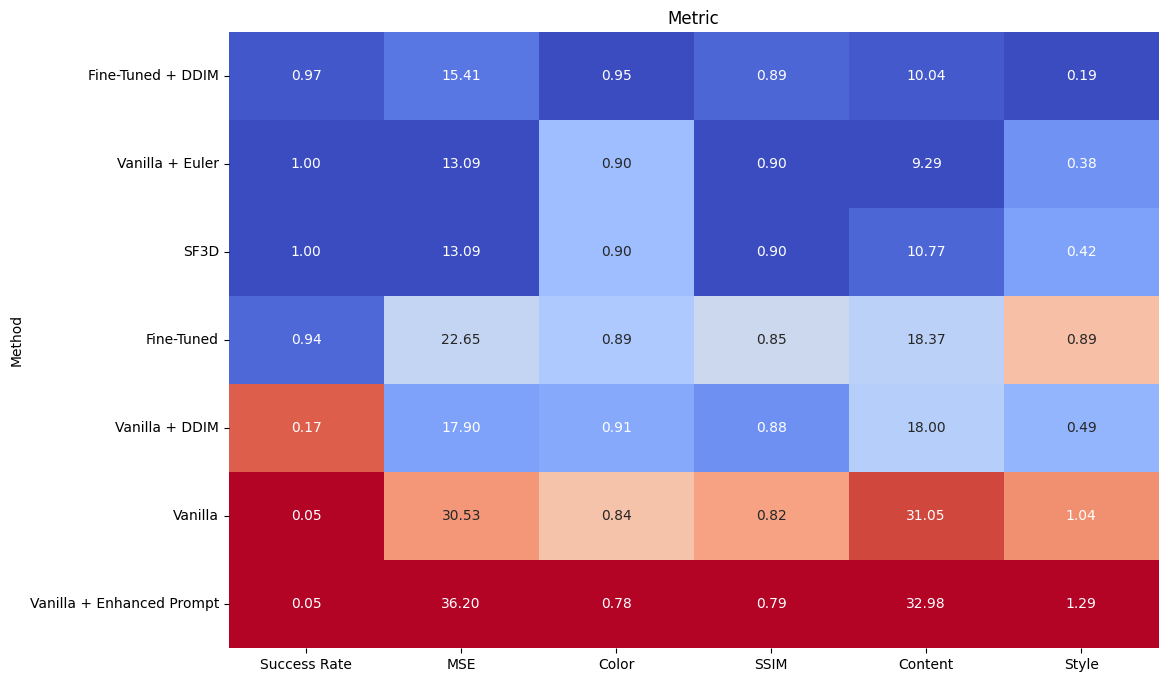

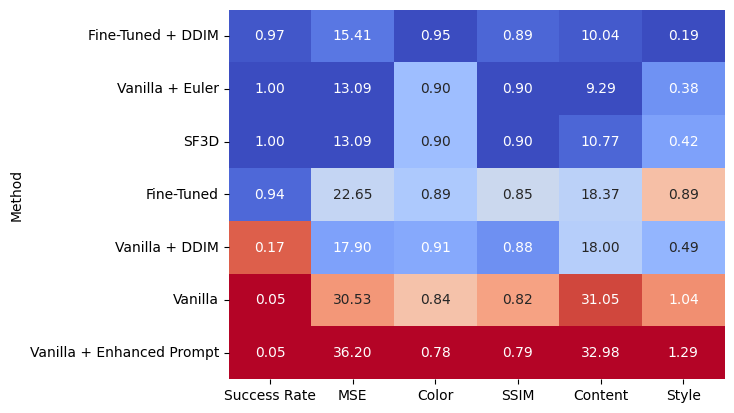

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# Create DataFrame
df = pd.DataFrame( )
 

data0={"Method": "Fine-Tuned + DDIM", "Success Rate": 0.975, 'MSE': 15.414100329081219, 'Color': 0.9479977751119704, 'SSIM': 0.8920534858071127,    'Content': 10.035277134180069, 'Style': 0.19470126312226058} 

data1={"Method": "Fine-Tuned", "Success Rate": 0.9375, 'MSE': 22.64571934541066, 'Color': 0.8914266735744594, 'SSIM': 0.8521200869848169,    'Content': 18.369458198547363, 'Style': 0.8944506253115833} 
data2={"Method": "Vanilla", "Success Rate": 0.05, 'MSE':30.52973313331604, 'Color': 0.8440683753140773, 'SSIM': 0.8211166134787031,    'Content': 31.047300720214842, 'Style': 1.0421497944742442} 
data3={"Method": "Vanilla + Enhanced Prompt", "Success Rate": 0.05, 'MSE': 36.20043046474457, 'Color': 0.7832437411852167, 'SSIM': 0.7923447621751813,    'Content': 32.981712102890015, 'Style': 1.286589751765132} 
data4={"Method": "SF3D", "Success Rate": 1.0, 'MSE': 13.091511726379395, 'Color': 0.8984969457576236, 'SSIM': 0.8982814333875513,    'Content': 10.770970726013184, 'Style': 0.4218773037195206} 
data5={"Method": "Vanilla + Euler", "Success Rate": 1, 'MSE': 13.091511726379395, 'Color': 0.8984969457576236, 'SSIM': 0.8982814333875513,    'Content': 9.294315758347512, 'Style': 0.37810273803770544} 
data6={"Method": "Vanilla + DDIM", "Success Rate": 0.1666, 'MSE': 17.90114156405131, 'Color': 0.9096583776478422, 'SSIM': 0.8809681172671027,    'Content': 17.99575087428093, 'Style':0.48895684839226305} 


df = pd.concat([df, pd.DataFrame([data0])], ignore_index=True)

df = pd.concat([df, pd.DataFrame([data5])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data4])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data1])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data6])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data3])], ignore_index=True)

 
# Extract all rows into a list of dictionaries
rows_as_dicts = df.to_dict(orient="records")

# Print each row in the required format
for row in rows_as_dicts:
    print(row)
 
# Convert all numeric columns to numeric types
for column in df.columns[1:]:  # Skip the "Method" column
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Specify metrics where higher is better
higher_is_better = ["SSIM", "Color", "Success Rate"]

# Normalize each metric individually
normalized_df = df.copy()
for column in df.columns:
    if column == "Method":
        continue  # Skip the Method column
    col_min = df[column].min()
    col_max = df[column].max()
    if column in higher_is_better:
        # Higher is better: normalize normally
        normalized_df[column] = (df[column] - col_min) / (col_max - col_min)
    else:
        # Lower is better: invert the normalization
        normalized_df[column] = (col_max - df[column]) / (col_max - col_min)

# Set Method as index
normalized_df.set_index("Method", inplace=True)

# Heatmap with per-metric normalization
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False)
plt.title("Metric", fontsize=12)
plt.show()
sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False).figure.savefig("heatmap2.png", dpi=300, bbox_inches="tight")


## Plot Values Test 1

{'Method': 'FLUX.1-Fill + LoRa', 'Success Rate': 0.92, 'FID': 53.44525091103658, 'MSE': 26.491029699643455, 'Color': 0.894849460054346, 'SSIM': 0.8372767841497206, 'Content': 15.129033364355564, 'Style': 0.7976360883330926}
{'Method': 'FLUX.1-Fill', 'Success Rate': 0.875, 'FID': 57.06950049582295, 'MSE': 24.800671845674515, 'Color': 0.8985242948708714, 'SSIM': 0.8304556734014619, 'Content': 17.379472710192204, 'Style': 0.6666953710373491}
{'Method': 'FLUX.1-Fill + LoRa (intuitive)', 'Success Rate': 0.78, 'FID': 56.61833819630645, 'MSE': 29.020693053801853, 'Color': 0.8810582656731308, 'SSIM': 0.7922108358535449, 'Content': 17.155042596161366, 'Style': 1.15559113281779}
{'Method': 'Flux.1-Fill (intuitive)', 'Success Rate': 0.21, 'FID': 63.63201222614522, 'MSE': 27.58878392643399, 'Color': 0.900479991860014, 'SSIM': 0.7666529939909417, 'Content': 24.579397320747375, 'Style': 0.7934183732916912}
{'Method': 'SDXL-Inpaint', 'Success Rate': 0.4687, 'FID': 64.92673140896724, 'MSE': 30.5327909

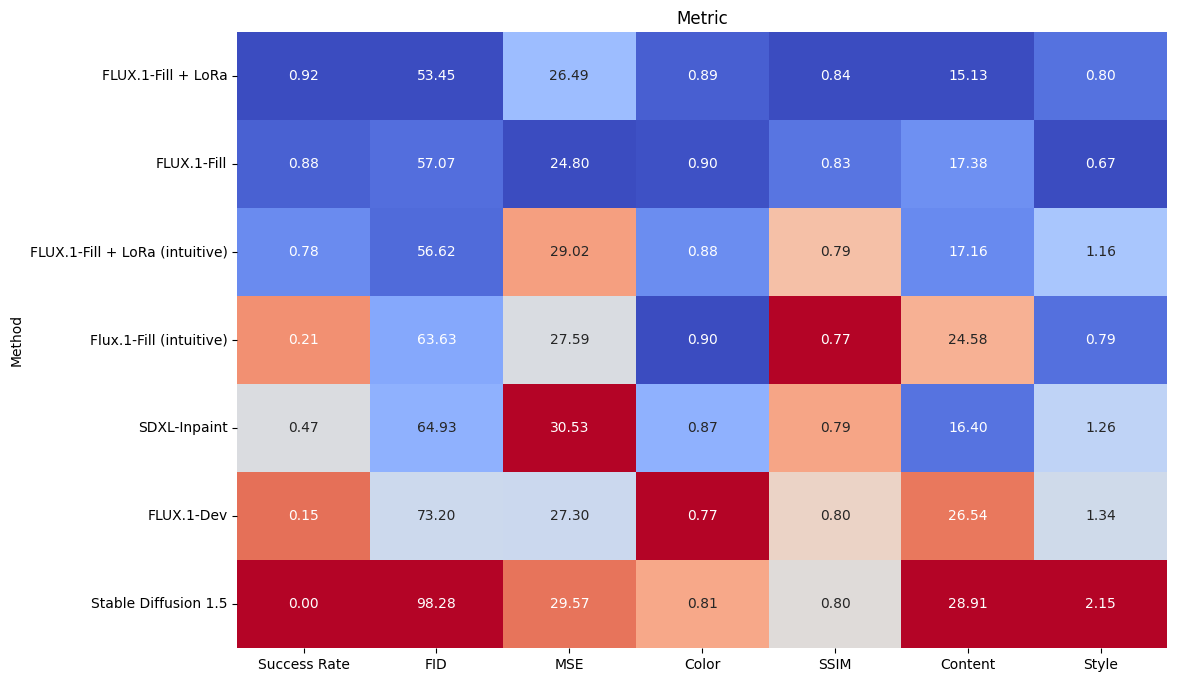

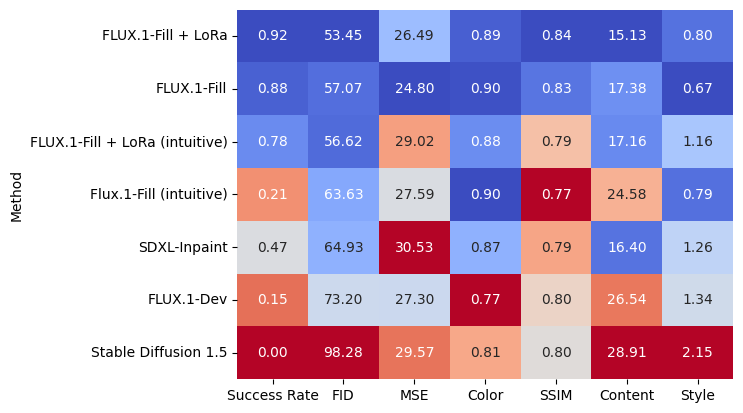

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
# Create DataFrame
df = pd.DataFrame( )

data1={'Method': 'FLUX.1-Fill', 'Success Rate': 0.875,   "FID": 57.06950049582295, 'MSE': 24.800671845674515, 'Color': 0.8985242948708714, 'SSIM': 0.8304556734014619,     'Content': 17.379472710192204, 'Style': 0.6666953710373491}
data2={'Method': 'FLUX.1-Dev', 'Success Rate': 0.147,   "FID": 73.2013193883779, 'MSE': 27.298734851911956, 'Color': 0.7742114349764494, 'SSIM': 0.797553719488004,    'Content': 26.540441176470587, 'Style': 1.3394425020498388}
data3={'Method': 'Stable Diffusion 1.5', 'Success Rate': 0.0,   "FID": 98.28277040094463, 'MSE': 29.572909573713936, 'Color': 0.810410688369463, 'SSIM': 0.8012238371317602,    'Content': 28.91083997488022, 'Style': 2.1529677659273148}
data4={'Method': 'Flux.1-Fill (intuitive)', 'Success Rate': 0.21,   "FID": 63.63201222614522, 'MSE': 27.58878392643399, 'Color': 0.900479991860014, 'SSIM': 0.7666529939909417,     'Content': 24.579397320747375, 'Style': 0.7934183732916912}
data5={'Method': 'FLUX.1-Fill + LoRa (intuitive)', 'Success Rate': 0.78, "FID":56.61833819630645, 'MSE': 29.020693053801853, 'Color': 0.8810582656731308, 'SSIM': 0.7922108358535449,     'Content': 17.155042596161366, 'Style': 1.15559113281779}
data6={'Method': 'FLUX.1-Fill + LoRa', 'Success Rate': 0.92,  "FID": 53.44525091103658, 'MSE': 26.491029699643455, 'Color': 0.894849460054346, 'SSIM': 0.8372767841497206,    'Content': 15.129033364355564, 'Style': 0.7976360883330926}
data7={"Method": "SDXL-Inpaint", "Success Rate": 0.4687, "FID":64.92673140896724,'MSE': 30.53279097378254, 'Color': 0.8681581166282608, 'SSIM': 0.7863644509576097,    'Content': 16.40386562794447, 'Style': 1.256098945159465} 
df = pd.concat([df, pd.DataFrame([data6])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data1])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data5])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data4])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data7])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data2])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([data3])], ignore_index=True)
 
# Extract all rows into a list of dictionaries
rows_as_dicts = df.to_dict(orient="records")

# Print each row in the required format
for row in rows_as_dicts:
    print(row)
 
# Convert all numeric columns to numeric types
for column in df.columns[1:]:  # Skip the "Method" column
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Specify metrics where higher is better
higher_is_better = ["SSIM", "Color", "Success Rate"]

# Normalize each metric individually
normalized_df = df.copy()
for column in df.columns:
    if column == "Method":
        continue  # Skip the Method column
    col_min = df[column].min()
    col_max = df[column].max()
    if column in higher_is_better:
        # Higher is better: normalize normally
        normalized_df[column] = (df[column] - col_min) / (col_max - col_min)
    else:
        # Lower is better: invert the normalization
        normalized_df[column] = (col_max - df[column]) / (col_max - col_min)

# Set Method as index
normalized_df.set_index("Method", inplace=True)

# Heatmap with per-metric normalization
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False)
plt.title("Metric", fontsize=12)
plt.show()
sns.heatmap(normalized_df, annot=df.iloc[:, 1:], fmt=".2f", cmap="coolwarm_r", cbar=False).figure.savefig("heatmap1.png", dpi=300, bbox_inches="tight")








## Evaluation Suite Call

In [2]:
import os
from typing import List, Dict, Any
import numpy as np

def evaluate_images(gt_folder: str, gen_folder: str) -> Dict[str, Any]:
    """
    Evaluate generated images against ground truth images using various metrics.

    Parameters:
        gt_folder (str): Path to the ground truth images folder.
        gen_folder (str): Path to the generated images folder.

    Returns:
        Dict[str, Any]: A dictionary containing overall average metrics for the entire evaluation.
    """
    overall_metrics = {
        'perceptual_loss': [],
        'content_loss': [],
        'style_loss': [],
        'keypoints_comparison': [],
        'histogram_analysis': [],
        'mse_color': [], 
        'ssim_color': [],
        'fid':[]
    }

    # Iterate over ground truth images
    for gt_image_name in os.listdir(gt_folder):
        gt_image_path = os.path.join(gt_folder, gt_image_name)

        # Ensure it's an image file
        if not gt_image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Find corresponding generated images folder
        gen_image_subfolder = os.path.join(gen_folder, os.path.splitext(gt_image_name)[0])

        if not os.path.exists(gen_image_subfolder):
            print(f"No generated images found for {gt_image_name}.")
            continue

        # Iterate over generated images
        for gen_image_name in os.listdir(gen_image_subfolder):
            gen_image_path = os.path.join(gen_image_subfolder, gen_image_name)

            # Ensure it's an image file
            if not gen_image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Calculate metrics
            #perceptual_loss = calculate_perceptual_loss(gt_image_path, gen_image_path)
            #fid = calculate_fid(gt_image_path, gen_image_path)

            losses = calculate_losses(gt_image_path, gen_image_path)
            content_loss = losses['content_loss']
            style_loss = losses['style_loss']
            #keypoints_comparison = compare_keypoints(gt_image_path, gen_image_path, visualize=False)
            histogram_analysis = compare_histograms(gt_image_path, gen_image_path)
            mse_color = calculate_mse_color(gt_image_path, gen_image_path)
            ssim_color = calculate_ssim_color(gt_image_path, gen_image_path)
            
            # Append metrics to overall metrics list
            #overall_metrics['perceptual_loss'].append(perceptual_loss)
            overall_metrics['content_loss'].append(content_loss)
            overall_metrics['style_loss'].append(style_loss)
            #if keypoints_comparison is not None:
            #    overall_metrics['keypoints_comparison'].append(keypoints_comparison)
            overall_metrics['histogram_analysis'].append(histogram_analysis)
            overall_metrics['mse_color'].append(mse_color)
            overall_metrics['ssim_color'].append(ssim_color)
            #overall_metrics['fid'].append(fid)
           
    # Calculate overall averages
    average_metrics = {key: (np.mean(values) if values else None) for key, values in overall_metrics.items()}
    return average_metrics

gt_folder = "dataset/Test 4/gt_folder_scetch"
gen_folder = "dataset/Test 4/test-scetch"
evaluate_images(gt_folder, gen_folder)


NameError: name 'calculate_losses' is not defined

### Load Image Helpers

In [4]:
def load_image_grayscale(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale ('L' mode)
    return np.array(img)

def load_image_color(image_path):
    img = Image.open(image_path).convert('RGB')  
    return np.array(img)

### Frechet Inception Distance (FID)

In [24]:
def calculate_fid_directly(image1_path: str, image2_path: str) -> float:
    """
    Calculate FID between two individual images using pytorch-fid more efficiently.

    Parameters:
        image1_path (str): Path to the first image (real image).
        image2_path (str): Path to the second image (generated image).

    Returns:
        float: FID score.
    """
    from pytorch_fid import fid_score
    import torch
    from torchvision import transforms
    from PIL import Image
    import numpy as np

    # Preprocessing transformation
    transform = transforms.Compose([
        transforms.Resize((299, 299)),  # Resize to InceptionV3 expected input size
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Inception normalization
    ])

    def process_image(image_path):
        """Load and preprocess an image."""
        image = Image.open(image_path).convert("RGB")
        image = transform(image).unsqueeze(0)  # Add batch dimension
        return image

    # Load and preprocess both images
    image1 = process_image(image1_path)
    image2 = process_image(image2_path)

    # Stack images to create a batch
    images = torch.cat([image1, image2], dim=0)

    # Calculate FID using precomputed statistics
    device = "cuda" if torch.cuda.is_available() else "cpu"
    fid_value = fid_score.calculate_fid_given_images(
        images.to(device), batch_size=2, device=device, dims=2048
    )

    return fid_value

### Structural Similarity Index (SSIM)

In [6]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim_grayscale(image1_path, image2_path):
    image1 = load_image_grayscale(image1_path)
    image2 = load_image_grayscale(image2_path)
    
    score, diff = ssim(image1, image2, full=True)
    
    # Display the images and the difference map
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title("Image 1", pad=20)  # Adjust title position with pad
    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title("Image 2", pad=20)
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title(f"SSIM Difference Map\nSSIM Score: {score:.4f}", pad=20)
    
    for ax in axes:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return score

def calculate_ssim_color(image1_path, image2_path):
    image1 = load_image_color(image1_path)
    image2 = load_image_color(image2_path)

    # Compute SSIM for each color channel (R, G, B)
    ssim_scores = []
    for i in range(3):  # Loop over 3 color channels
        score, _ = ssim(image1[:, :, i], image2[:, :, i], full=True)
        ssim_scores.append(score)

    # Average SSIM score across all channels
    mean_ssim = np.mean(ssim_scores)

    return mean_ssim




### Mean Squared Error (MSE)

In [7]:
def calculate_mse_grayscale(image1_path, image2_path):
    image1 = load_image_grayscale(image1_path)
    image2 = load_image_grayscale(image2_path)
    
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions")
    
    mse = np.mean((image1 - image2) ** 2)
    
    return mse

def calculate_mse_color(image1_path, image2_path):
    image1 = load_image_color(image1_path)
    image2 = load_image_color(image2_path)
    
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions")
    
    mse_per_channel = []
    for i in range(3):  # R, G, B channels
        mse = np.mean((image1[:, :, i] - image2[:, :, i]) ** 2)
        mse_per_channel.append(mse)
    
    mean_mse = np.mean(mse_per_channel)
    
    return mean_mse



### Histogram Analysis

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def compute_color_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def compare_histograms(image1, image2, bins=(8, 8, 8)):
    image1 = cv2.imread(image1)
    image2 = cv2.imread(image2)
    hist1 = compute_color_histogram(image1, bins)
    hist2 = compute_color_histogram(image2, bins)
    
    # Use a similarity metric (e.g., Bhattacharyya Distance)
    bhattacharyya_distance = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)
    return 1 - bhattacharyya_distance  # Convert to similarity (1 = identical)

def compare_histograms_cosine(image_path1, image_path2, bins=(8, 8, 8)):
    # Load the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    
    # Compute histograms
    hist1 = compute_color_histogram(image1, bins)
    hist2 = compute_color_histogram(image2, bins)
    
    # Reshape histograms to 2D arrays for cosine similarity calculation
    hist1 = hist1.reshape(1, -1)
    hist2 = hist2.reshape(1, -1)
    
    # Compute cosine similarity
    similarity = cosine_similarity(hist1, hist2)[0, 0]
    return similarity

### Keypoint Comparison

In [9]:
from typing import List, Dict, Any
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from PIL import Image

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

def detect_keypoints(image):
    results = pose.process(image)
    keypoints = []
    
    if results.pose_landmarks:
        # Iterate through the landmarks and extract the x, y coordinates
        for landmark in results.pose_landmarks.landmark:
            keypoints.append((landmark.x, landmark.y))  # Normalized x, y coordinates
    
    return np.array(keypoints)

def visualize_keypoints(image, keypoints):
    plt.imshow(image)
    
    # Scale keypoints to the image size
    height, width, _ = image.shape
    for keypoint in keypoints:
        x, y = keypoint
        plt.scatter([x * width], [y * height], color='red', s=20)  # Scale to image size
    
    plt.axis('off')   
    plt.show()

def compare_keypoints(image1_path, image2_path, visualize=False):
    avg_distance = None  # Initialize the variable
    
    try:
        # Ensure these functions are properly defined elsewhere
        image1 = load_image_color(image1_path)
        image2 = load_image_color(image2_path)
        
        keypoints_image1 = detect_keypoints(image1)
        keypoints_image2 = detect_keypoints(image2)
        
        if len(keypoints_image1) == 0 or len(keypoints_image2) == 0:
            raise ValueError("Could not detect keypoints in one or both images.")
        
        # Ensure both keypoint arrays are the same shape before calculating distances
        if keypoints_image1.shape != keypoints_image2.shape:
            raise ValueError("Keypoint arrays are not the same shape.")
        
        distances = np.linalg.norm(keypoints_image1 - keypoints_image2, axis=1)
        avg_distance = np.mean(distances)
        
        if visualize:
            visualize_keypoints(image1, keypoints_image1)
            visualize_keypoints(image2, keypoints_image2)
    
    except ValueError as e:
        print(f"Skipping comparison for {image1_path} with {image2_path} due to error: {e}")
        avg_distance = None  # Explicitly set to None in case of an error
    
    return avg_distance

#avg_distance, distances = compare_keypoints(groundTruth, sample, visualize=True)
#print(f'Average Euclidean Distance Between Keypoints: {avg_distance}')

### Content and Style Loss 

In [10]:
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image

# Pretrained VGG model layers
pretrained_net = models.vgg19(pretrained=True)
style_layers, content_layers = [0, 5, 10], [25]
net = nn.Sequential(*[pretrained_net.features[i] for i in range(max(content_layers + style_layers) + 1)])

# Ensure model is on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

# Preprocessing function to prepare images for VGG19 input
def preprocess(image_path, image_shape):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(image_shape),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    tensor_image = transform(image).unsqueeze(0)  # Add batch dimension
    return tensor_image

# Extract content and style features
def extract_features(X):
    contents = []
    styles = []
    for i in range(len(net)):
        X = net[i](X)
        if i in style_layers:
            styles.append(X)
        if i in content_layers:
            contents.append(X)
    return contents, styles

# Gram matrix calculation for style loss
def gram(X):
    num_channels, n = X.shape[1], X.numel() // X.shape[1]
    X = X.view(num_channels, n)
    return torch.matmul(X, X.T) / (num_channels * n)

# Style loss function using Gram matrices
def style_loss(gram_Y_hat, gram_Y):
    return torch.mean((gram_Y_hat - gram_Y.detach()) ** 2)
    
def content_loss(Y_hat, Y):
    return torch.mean((Y_hat - Y.detach()) ** 2)

# Calculate style losses
def calculate_style_losses(groundTruth, sample, image_shape=(224, 224), style_weight=1e5):
    # Preprocess the images
    style_img1 = preprocess(groundTruth, image_shape).to(device)  # Ground truth image
    style_img2 = preprocess(sample, image_shape).to(device)  # Sample image

    # Extract style features from both images
    _, style_Y1 = extract_features(style_img1)  # Features from the ground truth
    _, style_Y2 = extract_features(style_img2)  # Features from the sample

    # Calculate Gram matrices for style features
    gram_Y1 = [gram(Y) for Y in style_Y1]
    gram_Y2 = [gram(Y) for Y in style_Y2]
    


    # Compute the style losses using the Gram matrices
    style_losses = [style_loss(Y2, Y1) * style_weight for Y1, Y2 in zip(gram_Y1, gram_Y2)]

    # Sum all style losses
    total_style_loss = sum(style_losses)

    return total_style_loss.item()

# Calculate both content and style losses
def calculate_losses(groundTruthImg, sampleImg, image_shape=(224, 224)):
    # Preprocess the images
    content_img1 = preprocess(groundTruthImg, image_shape).to(device)  # Ground truth image
    content_img2 = preprocess(sampleImg, image_shape).to(device)  # Sample image

    # Extract content features from both images
    content_Y1, _ = extract_features(content_img1)
    content_Y2, _ = extract_features(content_img2)

    # Calculate content loss
    content_losses = [content_loss(Y2, Y1) for Y1, Y2 in zip(content_Y1, content_Y2)]
    total_content_loss = sum(content_losses).item()

    # Calculate style loss
    total_style_loss = calculate_style_losses(groundTruthImg, sampleImg, image_shape)

    # Return the losses in a dictionary
    return {
        'content_loss': total_content_loss,
        'style_loss': total_style_loss
    }

# Test with same image to check if losses are computed differently
#print(calculate_losses("GT.png", "GT.png"))  # Replace with actual file paths


C:\Users\Sebastian\Desktop\VisualConsistencyEvaluator\.env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sebastian\Desktop\VisualConsistencyEvaluator\.env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# VGG Feature Extractor class with content and style layers
class VGGFeatureExtractor(nn.Module):
    def __init__(self):
        super(VGGFeatureExtractor, self).__init__()
        vgg = models.vgg19(pretrained=True).features
        # Specify the content and style layers
        self.content_layers = [25]
        self.style_layers = [0, 5, 10]
        self.net = nn.Sequential(*[vgg[i] for i in range(max(self.content_layers + self.style_layers) + 1)])

    def forward(self, x):
        content_features = []
        style_features = []
        for i, layer in enumerate(self.net):
            x = layer(x)
            if i in self.content_layers:
                content_features.append(x)
            if i in self.style_layers:
                style_features.append(x)
        return content_features, style_features

# Gram matrix for style loss
def gram_matrix(feature):
    (b, ch, h, w) = feature.size()
    features = feature.view(b, ch, h * w)
    G = torch.bmm(features, features.transpose(1, 2))
    return G / (ch * h * w)

# Load and preprocess image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
    ])
    image_tensor = preprocess(image).unsqueeze(0)  
    return image_tensor

# Visualization function for feature maps
def visualize_feature_map(feature_map, title):
    # We squeeze the batch dimension and convert the tensor to numpy
    feature_map = feature_map.squeeze(0).cpu().detach().numpy()

    # Normalize to the range [0, 1] for visualization
    min_val = np.min(feature_map)
    max_val = np.max(feature_map)
    feature_map = (feature_map - min_val) / (max_val - min_val)

    # Display the first few channels of the feature map
    num_channels = feature_map.shape[0]
    plt.figure(figsize=(20, 5))
    for i in range(min(8, num_channels)):  # Visualize only first 8 channels
        plt.subplot(1, 8, i + 1)
        plt.imshow(feature_map[i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualizing content and style feature maps
def visualize_content_style_features(image_path):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    
    # Initialize VGG feature extractor
    feature_extractor = VGGFeatureExtractor().eval()

    # Extract content and style features
    with torch.no_grad():
        content_features, style_features = feature_extractor(image)

    # Visualize content features (e.g., from the content layer)
    print("Visualizing Content Features:")
    visualize_feature_map(content_features[0], title="Content Features (Layer 25)")

    # Visualize style features from the style layers (e.g., from layer 0 and 28)
    print("Visualizing Style Features (Layer 0):")
    visualize_feature_map(style_features[0], title="Style Features (Layer 0)")

    print("Visualizing Style Features (Layer 28):")
    visualize_feature_map(style_features[-1], title="Style Features (Layer 10)")

 

# Others


### Visualize Feature Maps 

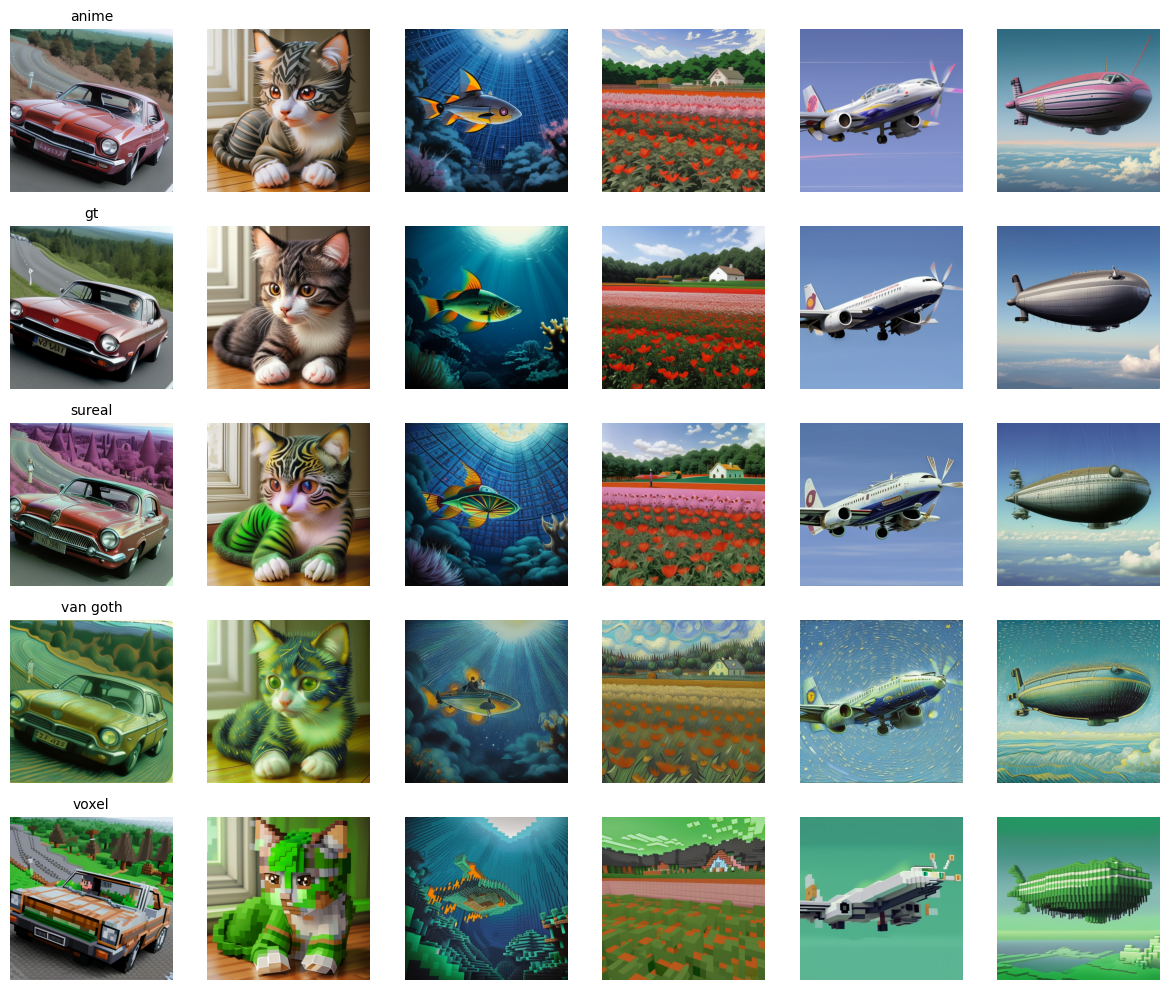

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_folder = "Dataset"

# Get list of all subfolders
style_folders = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, f))]

# Initialize a dictionary to store folder names and their images
images_by_folder = {}

# Process each folder
for folder in style_folders:
    folder_name = os.path.basename(folder)
    image_files = [f for f in os.listdir(folder) if f.endswith('.png') or f.endswith('.jpg')]
    images = []
    
    for image_file in image_files:
        image_path = os.path.join(folder, image_file)
        try:
            img = Image.open(image_path)
            images.append(img)
        except Exception as e:
            print(f"Could not load image {image_path}: {e}")
    
    images_by_folder[folder_name] = images

# Define the grid size
n_rows = len(images_by_folder)
n_cols = max(len(images) for images in images_by_folder.values())

# Create a figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

# Plot the images in a matrix
for row, (folder_name, images) in enumerate(images_by_folder.items()):
    for col in range(n_cols):
        ax = axes[row, col] if n_rows > 1 else axes[col]
        if col < len(images):
            # Plot the image
            ax.imshow(images[col])
            ax.set_title(folder_name, fontsize=10) if col == 0 else None
        else:
            # Empty cell
            ax.axis('off')
        ax.axis('off')  # Remove axis for all images

# Adjust layout
plt.tight_layout()
plt.show()


Style folders found: ['Dataset\\anime', 'Dataset\\gt', 'Dataset\\sureal', 'Dataset\\van goth', 'Dataset\\voxel']
anime
anime
anime
anime
gt
gt
gt
sureal
sureal
van goth


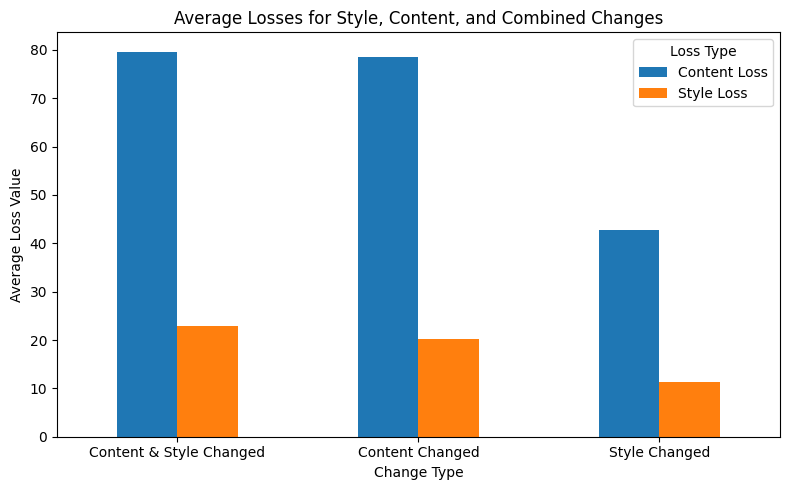

In [8]:
import os
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Path to the dataset folder
dataset_folder = "Dataset"

# Get list of all subfolders
style_folders = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, f))]
print(f"Style folders found: {style_folders}")

# Initialize a list to store results
data = []

# Process style folders for "Style Changed" and "Content & Style Changed"
for folder1, folder2 in itertools.combinations(style_folders, 2):  # All combinations of two folders
    folder1_name = os.path.basename(folder1)
    folder2_name = os.path.basename(folder2)
    print(folder1_name)
    images1 = [f for f in os.listdir(folder1) if f.endswith('.png')]
    images2 = [f for f in os.listdir(folder2) if f.endswith('.png')]

    for img1 in images1:
        for img2 in images2:
            # Full paths to the images
            img1_path = os.path.join(folder1, img1)
            img2_path = os.path.join(folder2, img2)

            # Determine the type of change
            if img1 == img2:
                change_type = "Style Changed"
            else:
                change_type = "Content & Style Changed"

            # Calculate losses
            losses = calculate_losses(img1_path, img2_path)

            # Append results
            data.append({
                'Change Type': change_type,
                'Content Loss': losses['content_loss'],
                'Style Loss': losses['style_loss']
            })

# Process within each folder for "Content Changed"
for folder in style_folders:
    images = [f for f in os.listdir(folder) if f.endswith('.png')]

    for img1, img2 in itertools.combinations(images, 2):  # All combinations of two images in the same folder
        img1_path = os.path.join(folder, img1)
        img2_path = os.path.join(folder, img2)

        change_type = "Content Changed"

        # Calculate losses
        losses = calculate_losses(img1_path, img2_path)

        # Append results
        data.append({
            'Change Type': change_type,
            'Content Loss': losses['content_loss'],
            'Style Loss': losses['style_loss']
        })

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Calculate averages for each change type
average_losses = df.groupby('Change Type')[['Content Loss', 'Style Loss']].mean().reset_index()

# Plotting the average losses for each category
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar chart
average_losses.plot(
    x='Change Type',
    y=['Content Loss', 'Style Loss'],
    kind='bar',
    ax=ax,
 )

# Add labels and title
ax.set_ylabel("Average Loss Value")
ax.set_xlabel("Change Type")
ax.set_title("Average Losses for Style, Content, and Combined Changes")
ax.legend(title="Loss Type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.tight_layout()

# Display the chart
plt.show()

In [8]:
import os
from PIL import Image
import numpy as np

def create_collage(root_folder, output_file, image_size=(100, 100)):
    """
    Create a collage where each subfolder is a row and has one image from each subsubfolder.

    :param root_folder: Path to the root folder.
    :param output_file: Path to save the output collage.
    :param image_size: Size (width, height) to which each image is resized.
    """
    rows = []  # List to hold rows of images

    # Traverse subfolders
    for subfolder in sorted(os.listdir(root_folder)):
        subfolder_path = os.path.join(root_folder, subfolder)

        if not os.path.isdir(subfolder_path):
            continue
        print(subfolder_path)

        row_images = []  # List to hold images for the current row

        # Traverse subsubfolders
        for subsubfolder in sorted(os.listdir(subfolder_path)):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            if not os.path.isdir(subsubfolder_path):
                continue

            # Get the first image in the subsubfolder
            images = [f for f in os.listdir(subsubfolder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

            if images:
                image_path = os.path.join(subsubfolder_path, images[0])
                try:
                    with Image.open(image_path) as img:
                        img_resized = img.resize(image_size)
                        row_images.append(img_resized)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

        # If there are images in this row, append to rows
        if row_images:
            row_width = sum(img.size[0] for img in row_images)
            row_height = image_size[1]
            row_image = Image.new('RGB', (row_width, row_height))

            # Paste images side by side
            x_offset = 0
            for img in row_images:
                row_image.paste(img, (x_offset, 0))
                x_offset += img.size[0]

            rows.append(row_image)

    # Combine rows into a single collage
    if rows:
        collage_width = max(row.size[0] for row in rows)
        collage_height = sum(row.size[1] for row in rows)
        collage = Image.new('RGB', (collage_width, collage_height))

        y_offset = 0
        for row in rows:
            collage.paste(row, (0, y_offset))
            y_offset += row.size[1]

        # Save the collage
        collage.save(output_file)
        print(f"Collage saved to {output_file}")
    else:
        print("No images found to create a collage.")

# Example usage
root_folder = "dataset"  # Replace with your folder path
output_file = "collage.jpg"  # Replace with your desired output file path
create_collage(root_folder, output_file)


dataset\Flux-Dev
dataset\Flux-Fill
dataset\Flux-Fill-Intuitive
dataset\Flux-Fill-LoRa
dataset\Flux-Fill-LoRa-Intuitive
dataset\SDXL-inpaint
dataset\blank
dataset\dreamshaper-8
dataset\gt_folder
Collage saved to collage.jpg
